In [146]:
from alchemlyb_module.src.alchemlyb.parsing import amber
import alchemlyb
import warnings

In [110]:
#list all file in the directory
import os
path='/Users/freyali/2023summerb/2023summer/alchemlyb/data/'
file_raw=os.listdir(path=path)


In [134]:
ordered_list=list(filter(lambda x: x[-1].isdigit(),file_raw))
ordered_list.sort()
ordered_list
#暂时不包含0.0 （not decoded)
ordered_list=ordered_list[1:]
ordered_list


['0.0479',
 '0.1151',
 '0.2063',
 '0.25',
 '0.3161',
 '0.37',
 '0.4374',
 '0.5626',
 '0.6839',
 '0.7937',
 '0.885',
 '0.9521',
 '1.0']

In [158]:
#concat dHdl dataframes
warnings.filterwarnings("ignore")
dfs_dHdl=[]
for i in ordered_list:
     dfs_dHdl.append(amber.extract_dHdl(f'/Users/freyali/2023summerb/2023summer/alchemlyb/data/{i}/ti.out', 300))

df_dHdl=alchemlyb.concat(dfs_dHdl)        

df_dHdl

,,dHdl
time,lambdas,
42.0,0.0479,13.348401
44.0,0.0479,13.570153
46.0,0.0479,12.992793
48.0,0.0479,12.886110
50.0,0.0479,11.822304
...,...,...
2032.0,1.0000,0.000000
2034.0,1.0000,0.000000
2036.0,1.0000,0.000000


In [157]:
#concat u_nk  dataframes
dfs_u_nk=[]
for i in ordered_list:
     dfs_u_nk.append(amber.extract_u_nk(f'/Users/freyali/2023summerb/2023summer/alchemlyb/data/{i}/ti.out', 300))

df_u_nk=alchemlyb.concat(dfs_u_nk)        
df_u_nk

,,0.0000,0.0479,0.1151,0.2063,0.2500,0.3161,0.3700,0.4374,0.5626,0.6839,0.7937,0.8850,0.9521,1.0000
time,lambdas,,,,,,,,,,,,,,
42.0,0.0479,-0.219402,0.000000,2.401026,10.906961,16.478833,25.968896,34.816379,48.661710,96.358932,233.805335,651.870743,1401.377393,1794.253203,1836.901391
44.0,0.0479,-0.223175,0.000000,2.425206,10.746926,15.940037,24.223708,31.245287,40.949617,66.034188,104.825305,146.934008,171.975106,178.861966,179.489670
46.0,0.0479,-0.213675,0.000000,2.322600,10.282912,15.234624,23.155746,30.046094,40.286089,73.392315,151.110313,300.634962,452.848174,507.818108,513.159198
48.0,0.0479,-0.212149,0.000000,2.275524,9.610621,13.730654,19.337323,22.994427,26.522652,31.735775,37.684937,44.143838,48.243803,49.417940,49.525887
50.0,0.0479,-0.194491,0.000000,2.105162,9.153258,13.332411,19.443054,23.941582,29.180404,40.277418,56.374923,74.118829,84.790017,87.695926,87.958896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032.0,1.0000,-36.655113,-36.464852,-34.417618,-27.755323,-23.997966,-18.953287,-15.820590,-13.132624,-10.277088,-7.462348,-3.671624,-0.904260,-0.076600,0.000000
2034.0,1.0000,-34.230642,-34.047055,-32.074644,-25.699859,-22.146088,-17.462681,-14.655803,-12.391186,-10.251057,-7.829626,-3.992587,-1.003829,-0.085559,0.000000
2036.0,1.0000,-38.167583,-37.984461,-36.007231,-29.490709,-25.761534,-20.684997,-17.473305,-14.639809,-11.416709,-8.174624,-4.010980,-0.996843,-0.084863,0.000000


## Visualization

##### Overlap Matrix of the MBAR

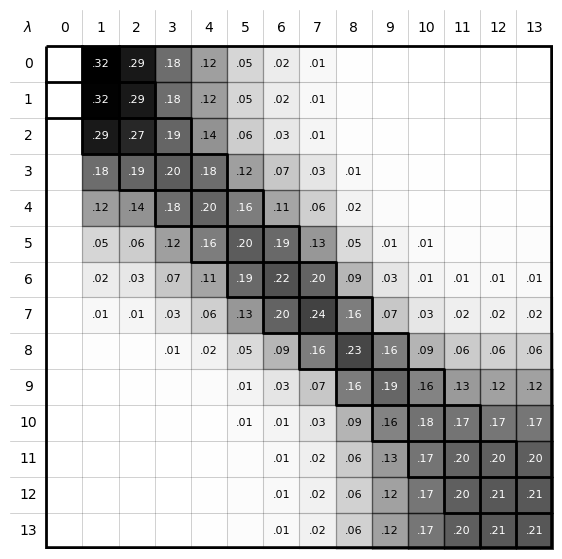

In [211]:
from alchemlyb.estimators import MBAR
mbar_coul = MBAR()
mbar_coul.fit(df_u_nk)
from alchemlyb.visualisation import plot_mbar_overlap_matrix

ax = plot_mbar_overlap_matrix(mbar_coul.overlap_matrix)


#### dhdl Plot of the TI

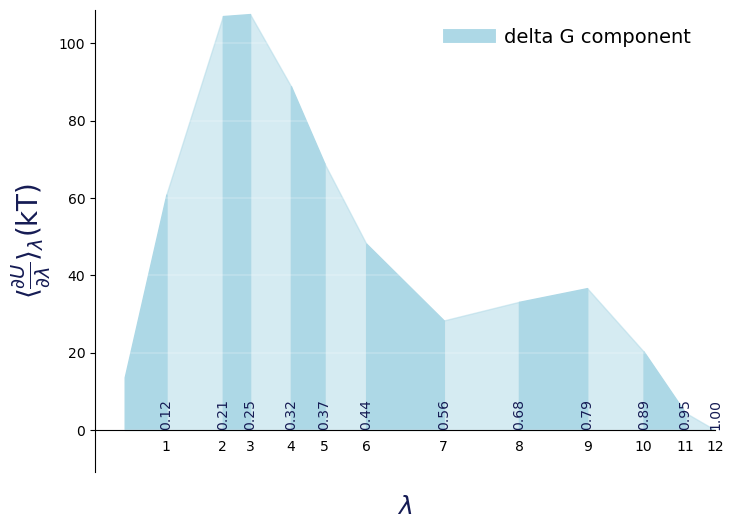

In [176]:
from alchemlyb.estimators import TI

ti = TI().fit(df_dHdl)

from alchemlyb.visualisation import plot_ti_dhdl
ax = plot_ti_dhdl([ti], labels=['delta G component '], colors=['lightblue'])


#### dF States Plots between Different estimators

In [177]:
from alchemlyb.estimators import MBAR, TI, BAR
import matplotlib.pyplot as plt
import pandas as pd
from alchemlyb.visualisation.dF_state import plot_dF_state


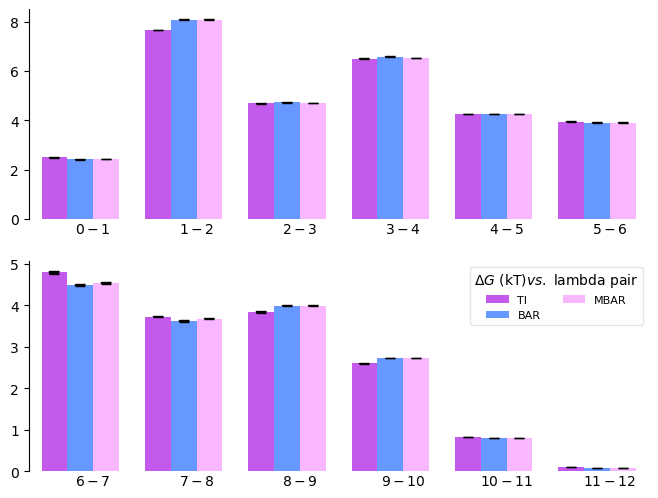

In [206]:
from alchemtest.gmx import load_benzene
from alchemlyb.parsing.gmx import extract_u_nk, extract_dHdl
from alchemlyb.estimators import MBAR, TI, BAR
import matplotlib.pyplot as plt
import pandas as pd
from alchemlyb.visualisation.dF_state import plot_dF_state

ti = TI().fit(df_dHdl)

bar = BAR().fit(df_u_nk[[0.0479,0.1151,0.2063,0.2500,0.3161,0.3700,0.4374,0.5626,0.6839,0.7937,0.8850,0.9521,1.0000]])

mbar = MBAR().fit(df_u_nk[[0.0479,0.1151,0.2063,0.2500,0.3161,0.3700,0.4374,0.5626,0.6839,0.7937,0.8850,0.9521,1.0000]])


estimators = [ti,bar,mbar]

fig = plot_dF_state(estimators, orientation='portrait')


### Forward and Backward Convergence

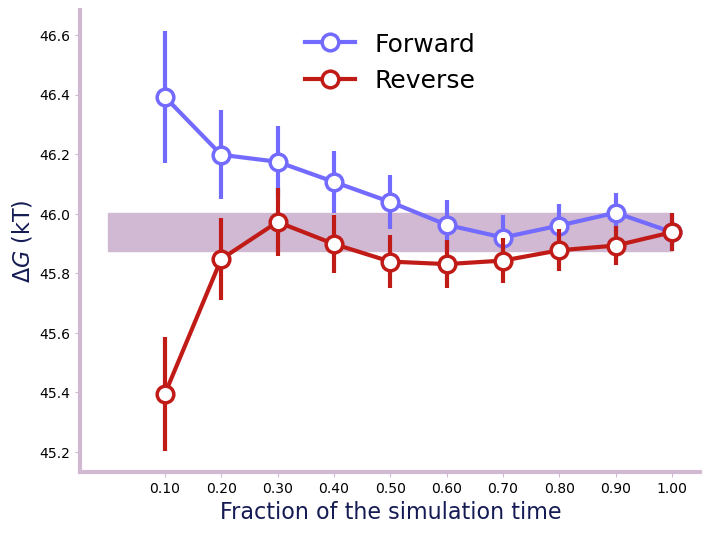

In [213]:
import pandas as pd
from alchemtest.gmx import load_benzene
from alchemlyb.parsing.gmx import extract_u_nk
from alchemlyb.estimators import MBAR


dfs_u_nk

forward = []
forward_error = []
backward = []
backward_error = []
num_points = 10
for i in range(1, num_points+1):
    # Do the forward
    slice = int(len(dfs_u_nk[0])/num_points*i)
    u_nk = alchemlyb.concat([data[:slice] for data in dfs_u_nk])
    estimate = MBAR().fit(u_nk)
    forward.append(estimate.delta_f_.iloc[0,-1])
    forward_error.append(estimate.d_delta_f_.iloc[0,-1])
    # Do the backward
    u_nk = alchemlyb.concat([data[-slice:] for data in dfs_u_nk])
    estimate = MBAR().fit(u_nk)
    backward.append(estimate.delta_f_.iloc[0,-1])
    backward_error.append(estimate.d_delta_f_.iloc[0,-1])


from alchemlyb.visualisation import plot_convergence
ax = plot_convergence(forward, forward_error, backward, backward_error)
